In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
# Standard plotly imports

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# import cufflinks
import plotly.express as px
# cufflinks.go_offline(connected=True)

%matplotlib inline

In [28]:
data = []
epoch_no = 0
with open("resnet50.txt") as result:
    while True:
        line = result.readline()
#         print(line)
        if line == '':
            break
        
        if line.startswith('E'):
            data.append({})
            
        line = result.readline().split(';')
        train_loss = line[0].split(':')[1].lstrip()
        data[epoch_no]['train_loss'] = float(train_loss)
        
        train_acc = line[1].split(':')[1].strip()
        data[epoch_no]['train_acc'] = float(train_acc)
        
        line = result.readline().split(';')
        test_loss = line[0].split(':')[1].lstrip()
        data[epoch_no]['test_loss'] = float(test_loss)
        
        test_acc = line[1].split(':')[1].strip()
        data[epoch_no]['test_acc'] = float(test_acc)
        
        epoch_no += 1

In [29]:
df = pd.DataFrame(data)
df['Epoch'] = df.index + 1

df.head()

,train_loss,train_acc,test_loss,test_acc,Epoch
0,1.7211,0.3651,1.5062,0.4380,1
1,1.3127,0.5243,1.1728,0.5689,2
2,1.1295,0.5952,0.9911,0.6416,3
3,1.0146,0.6346,1.0275,0.6374,4
4,0.9228,0.6698,0.9747,0.6662,5


In [30]:
fig = go.Figure()

fig = fig.add_trace(go.Scatter(x=df["Epoch"], y=df["train_loss"],
                    mode='lines+markers',
                    name='Training Loss'))

fig.add_trace(go.Scatter(x=df["Epoch"], y=df["train_acc"],
                    mode='lines+markers',
                    name='Training Accuracy'))

fig.add_trace(go.Scatter(x=df["Epoch"], y=df["test_acc"],
                    mode='lines+markers',
                    name='Test Accuracy'))

fig.add_trace(go.Scatter(x=df["Epoch"], y=df["test_loss"],
                    mode='lines+markers',
                    name='Test loss'))
# Edit the layout
fig.update_layout(title='Accuracy and Losses',
                   xaxis_title='Epoch',
                   yaxis_title='Accuracy and Loss')
# fig.show()

In [31]:
def plot_accuracy(test_accuracy: list,train_accuracy,model_name,ep, file_name):
    """Plot accuracy"""
    plt.figure()
    x =  range(1,ep+1)
    plt.plot(x,test_accuracy,color='b',label='Test')
    plt.plot(x,train_accuracy,color='r',label='Train')
    plt.title(model_name)
    # plt.xticks(
    #     [i for i in range(0, len(accuracy))],
    #     [i + 1 for i in range(0, len(accuracy))])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.savefig(file_name + '.png')
    plt.show()
    

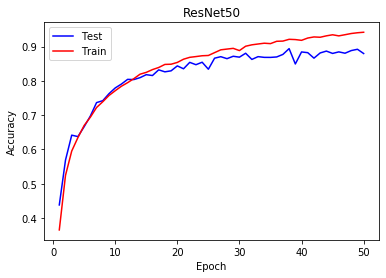

In [32]:
plot_accuracy(df['test_acc'].tolist(), df['train_acc'].tolist(), 'ResNet50', 50, "Resnet acc plot")

In [33]:
def plot_loss(test_loss: list,train_loss,model_name,ep, file_name):
    """Plot loss"""
    plt.figure()
    x =  range(1,ep+1)
    plt.plot(x,test_loss,color='b',label='Test')
    plt.plot(x,train_loss,color='r',label='Train')
    plt.title(model_name)
    # plt.xticks(
    #     [i for i in range(0, len(loss))],
    #     [i + 1 for i in range(0, len(loss))])
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.savefig(file_name + '.png')
    plt.show()

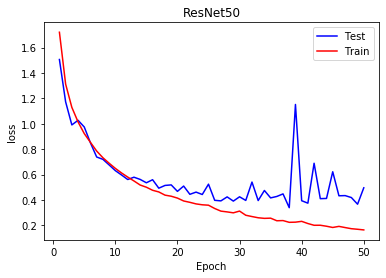

In [34]:
plot_loss(df['test_loss'].tolist(), df['train_loss'].tolist(), 'ResNet50', 50, "Resnet loss plot")